## **Machine Learning for Business Analytics**

Team 1: Belen Ramirez, Ben Bucaj, Nguyen Le, and Ryan Rodriguez.

**World Hapiness Supervised Learning Model**

The problem we are addressing is understanding what factors contribute most to a country's happiness and how these factors can be used to predict whether a country ranks among the happiest in the world. Global happiness is influenced by complex variables like GDP, health, freedom, and social support, but it is not always clear how these interact or which are the most significant predictors. By analyzing data from multiple years and applying machine learning models, our project aims to uncover patterns and provide insights into what drives happiness at a global level.


**Conclusion**

In this project, we evaluated multiple machine learning models, including K-Nearest Neighbors, Lasso Regression, Logistic Regression, Decision Tree, and Random Forest to predict world happiness rankings. Among these, Random Forest proved to be the best-performing model, not only achieving the highest accuracy score but also outperforming the other models due to its ensemble-based structure.

The Random Forest algorithm's strength lies in its ability to combine predictions from multiple decision trees, each trained on different subsets of the data and features. This ensemble approach inherently reduces overfitting by aggregating diverse predictions to achieve a more generalized and reliable output.

Compared to other models:

- KNN, though simple and almost as effective as Random Forest, it lacks the ability to model interactions between variables as well as Random Forest when it comes to large datasets.
- Lasso Regression, while useful for feature selection, assumes linear relationships and struggles with capturing the intricate interactions between happiness factors.
- Logistic Regression is limited to linear decision boundaries, which may oversimplify the relationships in the data.
- Decision Trees, while interpretable, are prone to overfitting when used alone, especially with small variations in the training data.

In contrast, Random Forest capitalizes on the strengths of Decision Trees while mitigating their weaknesses. By averaging predictions across a diverse ensemble, it captures complex patterns and interactions in the data, leading to superior performance in predicting happiness rankings.

This study highlights Random Forest's ability to accurately model and generalize from diverse global happiness indicators makes it a powerful tool for providing actionable insights to policymakers.

**Why is this important?**

This project is important because happiness is increasingly recognized as a key measure of a country’s progress, complementing traditional metrics like GDP. The World Happiness Report is already used by governments and organizations to inform decisions that directly impact people's quality of life. By identifying and analyzing the factors that drive happiness and how they interact, our work can provide valuable insights for creating more effective policies to enhance well-being.

Moreover, understanding how different variables—such as GDP, health, freedom, and social support—interact and influence happiness offers a nuanced perspective that can guide efforts to address inequities by highlighting how diverse social and economic structures impact happiness across regions. Ultimately, our project contributes to the growing emphasis on using well-being to build fairer, more sustainable societies.


**Data Description**

Source: Kaggle, World Happiness Report
https://www.kaggle.com/datasets/unsdsn/world-happiness/data

1. **Economy (GDP per Capita):**
This predictor measures a country's economic strength in terms of GDP per capita, adjusted for Purchasing Power Parity (PPP) in constant international dollars. It reflects the average income and economic resources available to individuals, which strongly correlates with happiness, as wealthier nations can typically provide better infrastructure, healthcare, and quality of life.
2. **Family (Social Support):**
Family or social support captures the national average of responses to the question: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them?” It indicates the strength of social networks and the availability of reliable relationships, which are key contributors to emotional and psychological well-being.
3. **Health (Life Expectancy):**
This measures the healthy life expectancy at birth, based on data from the World Health Organization (WHO). It reflects the quality of healthcare and the general well-being of a population, as longer life expectancy is typically associated with better living conditions and access to medical resources.
4. **Freedom (Freedom to Make Life Choices):**
This variable reflects the extent to which individuals feel free to make personal life decisions. Based on national averages of responses to the question: "Are you satisfied with your freedom to choose what you do with your life?" it emphasizes the importance of autonomy and personal agency in contributing to happiness.
5. **Trust (Government Corruption):**
Trust measures perceptions of corruption in government and business, based on binary responses to questions about whether corruption is widespread. Lower perceptions of corruption (higher trust) correlate with greater happiness, as trust in institutions enhances a sense of security and fairness.
6. **Generosity:**
Generosity is derived from responses to the question: "Have you donated money to a charity in the past month?" and adjusted for GDP per capita to isolate altruistic behavior from economic capability. Generosity reflects social cohesion and a willingness to help others, both of which are linked to positive emotions and happiness.
7. **Region:**
Region captures the geographical and cultural context in which a country exists. Regional differences often account for variations in happiness due to shared cultural values, economic conditions, and social norms that influence perceptions of well-being and the importance of different factors.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2015-2019 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each factor contribute to making life evaluations higher in each country. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# **Import Data**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
fifteen = pd.read_csv('/data/2015.csv')
sixteen = pd.read_csv('/data/2016.csv')
seventeen = pd.read_csv('/data/2017.csv')
eighteen = pd.read_csv('/data/2018.csv')
nineteen = pd.read_csv('/data/2019.csv')

# **Preprocessing the data**

**1. Combining the datasets**

In [3]:
#renames columns to ensure consistency across the datasets, making them easier to analyze or combine.

seventeen = seventeen.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
    'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'
})

eighteen = eighteen.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})
nineteen = nineteen.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})

In [4]:
dfs = [fifteen, sixteen, seventeen, eighteen, nineteen]

In [5]:
for df in dfs:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Gene

**2. Dropping unnecessary or duplicate rows and columns**


*   Dystopia Residual, Lower Confidence Interval, Upper Confidence Interval, Whisker.high, and Whisker.low are columns that only exist in two datasets. We decided to remove them because of irrelevance and missing data.
*   Happiness Score and Standard Error are two unnecessary columns for our analysis. Happines Score is a metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness?", and Standard Error is the standard error of the hapiness score.
*   Hapiness.Score and Score are duplicates of the Hapiness Score that was deleted. Dystopia.Residual is a duplicate of Dystopia Residual that was deleted.
*   Rows where the Country is Northern Cyprus or Northern Macedonia was removed because only the 2018 and 2019 datasets have this rows.



In [6]:
df = pd.concat(dfs)
df =df.sort_values(by = ['Country'])

#Removes unnecessary or duplicate columns related to happiness scores and confidence intervals.
df = df.drop(columns=['Happiness Score','Standard Error','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval','Happiness.Score','Whisker.high','Whisker.low','Dystopia.Residual','Score',])
df = df.reset_index()

#Removes rows where the Country is 'Northern Cyprus' or 'Northern Macedonia'
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Cyprus')].index)
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Macedonia')].index)

**3. Missclassification**

In cases of country-level analysis (such as happiness scores or economic indicators), it's important to correctly assign the region's name to avoid misinterpretation. Somaliland is a self-declared independent state that considers itself separate from Somalia, though it is internationally recognized as part of Somalia. Below we can see how one row got misclassified as Somalia, when it should have been Somaliland Region.

In [7]:
somalia_rows = df[df['Country'] == 'Somalia']

# Display the filtered rows
print(somalia_rows)

     index  Country              Region  Happiness Rank  \
624    111  Somalia                 NaN             112   
625     75  Somalia  Sub-Saharan Africa              76   
626     97  Somalia                 NaN              98   
627     92  Somalia                 NaN              93   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
624                  0.000000  0.698000                  0.268000  0.559000   
625                  0.000000  0.336130                  0.114660  0.567780   
626                  0.000000  0.712000                  0.115000  0.674000   
627                  0.022643  0.721151                  0.113989  0.602127   

     Trust (Government Corruption)  Generosity  
624                        0.27000    0.243000  
625                        0.31180    0.272250  
626                        0.28200    0.238000  
627                        0.28241    0.291631  


In [8]:
df.at[625,'Country'] = 'Somaliland Region'

In [9]:
somaliland_rows = df[df['Country'] == 'Somaliland Region']

# Display the filtered rows
print(somaliland_rows)

     index            Country              Region  Happiness Rank  \
625     75  Somaliland Region  Sub-Saharan Africa              76   
628     96  Somaliland Region  Sub-Saharan Africa              97   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
625                   0.00000  0.33613                   0.11466  0.56778   
628                   0.25558  0.75862                   0.33108  0.39130   

     Trust (Government Corruption)  Generosity  
625                        0.31180     0.27225  
628                        0.36794     0.51479  


With the code below we are updating the value in the 'Country' column at row index 625 from 'Somalia' to 'Somaliland Region' in the DataFrame.

In [10]:
country = df.loc[625, 'Country']
print(country)

Somaliland Region


**4. Dealing with nan's in region column**

In [11]:
missing_values = df.isnull().sum()

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
index                              0
Country                            0
Region                           465
Happiness Rank                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
dtype: int64


* Country has 465 missing values
* Trust has 1 misisng values

4.1 Removing Duplicates



*   Creates a list of unique country names from the 'Country' column of df by converting it to a set (removes duplicates).
* Sorts the unique countries alphabetically using sorted().



In [12]:
countries = list(set(df['Country'].values))
countries = sorted(countries)

4.2 Checking missing region data for each country

*   If all the regions are missing, the code removes the rows for that country from the DataFrame.
*   If any region is present, it replaces the missing (NaN) regions with the first valid region found for that country and adds the updated region information to the new_regions list.





In [13]:
new_regions = []
for i in range(len(countries)):
        country_index = np.where(df['Country'] == countries[i]) # Get df of current country
        current_country_df = df.iloc[country_index]
        if all(pd.isnull(current_country_df['Region'].values)): # if all null for regions, drop country from df
            country_index = np.where(df['Country'] == countries[i])[0]
            for vals in country_index:
                try:
                    df = df.drop(index = vals)
                except KeyError:
                    pass
        else:
            region_name_pos = np.where([type(x) == str for x in current_country_df['Region'].values])[0][0]
            region = current_country_df['Region'].values[region_name_pos]
            current_country_df = current_country_df.replace(np.nan, region)
            new_regions.append(current_country_df['Region'].values)

4.3 Updates to the Region variable

The code takes the new_regions list (which contains lists or arrays of region values), flattens it into a single list (region_vals), and counts the total number of region values. The value of k will be equal to the total number of region values in region_vals.

In [14]:
new_regions = list(new_regions)
k = 0
region_vals = []
for arr in new_regions:
    for vals in arr:
        region_vals.append(vals)
        k+=1

len(region_vals)

771

**5. Final preprocessing**


* Defining classes for training. By categorizing countries based on whether their "Happiness Rank" breaks the top 20 (1) or not (0), we are creating a binary target variable that simplifies the model's task and aligns it with our goal: distinguishing high-ranking from lower-ranking countries.

* Remove non-useful columns like 'Country', 'index'. This are identifiers that don’t provide predictive power and could introduce noise.

* Shuffle the dataset to prevent weird training





In [15]:
df['Region'] = region_vals

In [16]:
df.head(20)

,index,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,153,Afghanistan,Southern Asia,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
1,152,Afghanistan,Southern Asia,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
2,144,Afghanistan,Southern Asia,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
3,153,Afghanistan,Southern Asia,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
4,140,Afghanistan,Southern Asia,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
5,108,Albania,Central and Eastern Europe,109,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313
6,108,Albania,Central and Eastern Europe,109,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400
7,111,Albania,Central and Eastern Europe,112,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000
8,106,Albania,Central and Eastern Europe,107,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000
9,94,Albania,Central and Eastern Europe,95,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720


In [17]:
one_hot_regions = pd.get_dummies(df['Region'],prefix = 'Region')

In [18]:
df = df.join(one_hot_regions)

In [19]:
df = df.drop(columns = 'Region')

In [20]:
df

,index,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,153,Afghanistan,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,False,False,False,False,False,False,False,True,False,False
1,152,Afghanistan,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,False,False,False,False,False,False,False,True,False,False
2,144,Afghanistan,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,False,False,False,False,False,False,False,True,False,False
3,153,Afghanistan,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,False,False,False,False,False,False,False,True,False,False
4,140,Afghanistan,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,143,Zimbabwe,144,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,False,False,False,False,False,False,False,False,True,False
778,145,Zimbabwe,146,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,False,False,False,False,False,False,False,False,True,False
779,114,Zimbabwe,115,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,False,False,False,False,False,False,False,False,True,False
780,130,Zimbabwe,131,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,False,False,False,False,False,False,False,False,True,False


5.1 The code creates a new binary benchmark column where countries with a happiness rank of 20 or lower are marked with 1, and those with a rank above 20 are marked with 0. After updating the 'Happiness Rank' column, the DataFrame is shuffled randomly, reordering the rows.

In [21]:
happiness_benchmark = []
for rank in df['Happiness Rank'].values:
    if rank <= 20:
        happiness_benchmark.append(1)
    else:
        happiness_benchmark.append(0)
df['Happiness Rank'] = happiness_benchmark
df=df.sample(frac=1)

5.2 Dropping Columns

In [22]:
df = df.drop(columns = ['Country', 'index'])

The code removes rows with missing data from the DataFrame df and saves the values of the 'Happiness Rank' column into the variable output.

In [23]:
df = df.dropna(axis=0)
output = df['Happiness Rank']

The column 'Happiness Rank' is no longer needed for the analysis because the data has already been processed (converted to a binary benchmark earlier).

In [24]:
df = df.drop(columns = ['Happiness Rank'])

In [25]:
df.isnull().values.any()

False

# **List of predictors**

In [26]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
651,1.009850,1.259976,0.625131,0.561213,0.073654,0.490864,False,False,False,False,False,False,False,True,False,False
418,0.186000,0.541000,0.306000,0.531000,0.080000,0.210000,False,False,False,False,False,False,False,False,True,False
470,0.878115,0.774864,0.597711,0.408158,0.087763,0.032210,False,False,False,False,True,False,False,False,False,False
321,1.251140,1.197770,0.954460,0.262360,0.029010,0.228230,False,False,False,False,False,False,False,False,False,True
679,1.368000,1.430000,0.914000,0.351000,0.097000,0.242000,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,False,False,False,False,False,False,False,True,False,False
384,1.025640,0.800010,0.839470,0.339160,0.045820,0.218540,False,False,False,False,True,False,False,False,False,False
759,1.133670,1.033020,0.619040,0.198470,0.083040,0.042500,False,False,False,True,False,False,False,False,False,False
457,0.691770,0.831320,0.523090,0.252020,0.019030,0.199970,False,True,False,False,False,False,False,False,False,False


# **Visualizing Data**

**Correlation Matrix**

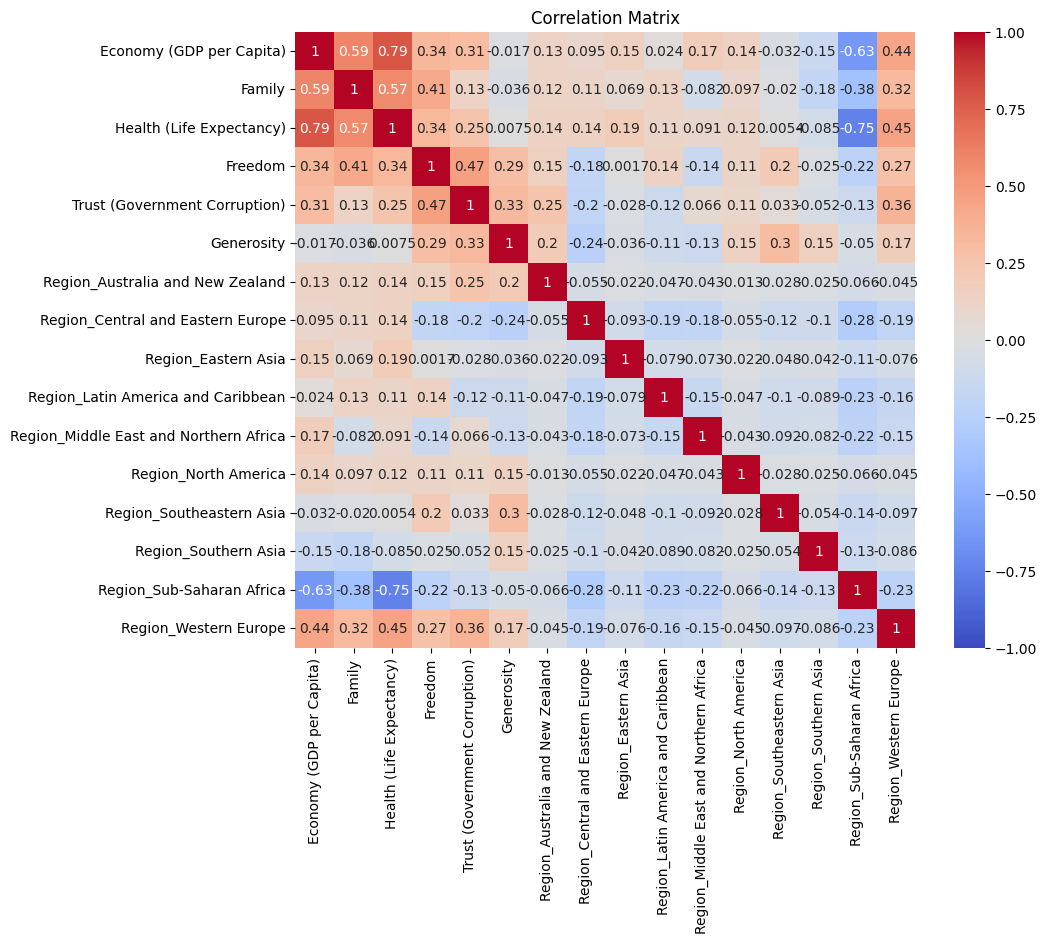

In [27]:
corm = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix we can observe the following:

1.   There's a positive correlation between:

      *   Economy (GDP) and the variables: Family, Health, and Region_Western Europe.
      *   Family and the variables: Freedom, Health, Economy
      *Freedom and Trust

2.   There's a negative correlation between:

      *   Region_Sub-Saharan Africa and the variables: Economy and Health.



In [28]:
df.describe()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.912127,1.078841,0.609818,0.410511,0.125471,0.217265
std,0.406005,0.330166,0.248174,0.152700,0.105930,0.121546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602086,0.869363,0.439063,0.309440,0.055000,0.129108
50%,0.978120,1.125000,0.645400,0.430770,0.090905,0.201835
75%,1.231960,1.330713,0.805571,0.530810,0.155340,0.277613
max,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075


**Scatterplots visualizing the relationship between predictors and outcome**

We chose to observe the relationships between the predictors that had the highest correlation in the matrix.

1. Economy vs Health

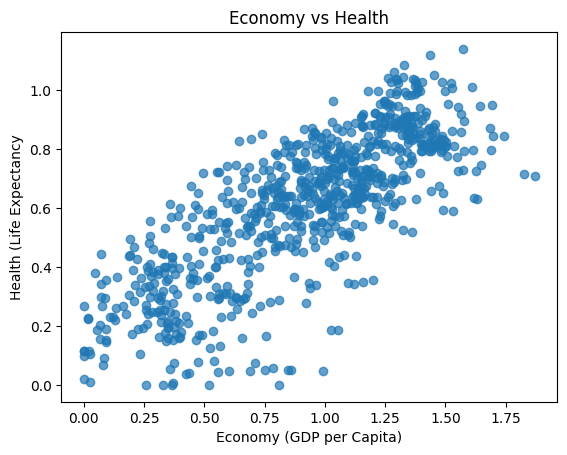

In [29]:
plt.scatter(df['Economy (GDP per Capita)'], df['Health (Life Expectancy)'], alpha=0.7)

plt.title('Economy vs Health')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy')
plt.show()

The scatterplot illustrates the relationship between Economy (GDP per Capita) and Health (Life Expectancy). The scatterplot shows a strong positive correlation between GDP per capita and life expectancy, indicating that wealthier countries tend to have better health outcomes. While the data follows an upward trend, the data points do not all fall perfectly along a single straight line. Instead, they are spread out around the trend, which suggests GDP per capita is not the only factor influencing life expectancy, highlighting the influence of other factors.

The [study published in the Journal of Population Sciences](https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#:~:text=GDP%20per%20capita%20increases%20the,to%20the%20prolongation%20of%20longevity.) notes that GDP per capita increases the affordability and accessibility of healthcare, education, and other resources necessary for better living conditions, which collectively contribute to the prolongation of life expectancy. This aligns with our current observation that wealthier countries tend to have better health outcomes, as these resources play a crucial role in improving health and quality of life.

2. Economy vs Family

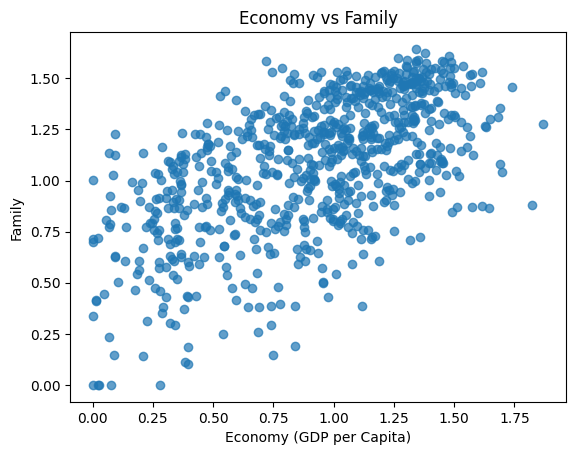

In [30]:
plt.scatter(df['Economy (GDP per Capita)'], df['Family'], alpha=0.7)
plt.title('Economy vs Family')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Family')
plt.show()


There is a positive correlation between GDP per capita and family/social contribution to happiness, suggesting that wealthier countries tend to report stronger networks of interpersonal support contributing to happiness. However, "family/social support" in this context refers not strictly to familial relationships but to having a network of people with whom one shares strong relationships—those who could be relied upon for help in times of trouble, as explained earlier in this notebook.

While this relationship exists, it is weaker and more scattered compared to the plot between GDP and life expectancy. This indicates that economic prosperity alone does not fully determine the strength of social support systems. Social support is also heavily shaped by cultural factors, societal norms, and levels of community engagement, which may not directly align with GDP per capita. For instance, a wealthy country with more individualistic societal values might score lower on this metric, while a less wealthy country with strong communal or family-oriented cultures might score unexpectedly high.

This [finding by Opportunity Insights](https://opportunityinsights.org/wp-content/uploads/2022/07/socialcapital_nontech.pdf) aligns with research showing that social networks are heavily stratified by socioeconomic class, where people tend to form connections within their income groups. Additionally, children who grow up in communities with greater economic connectedness—where cross-class interactions are more prevalent—are significantly more likely to escape poverty. This underscores the importance of not only economic prosperity but also social integration and community-level interactions in fostering supportive social networks

3. Trust vs Freedom

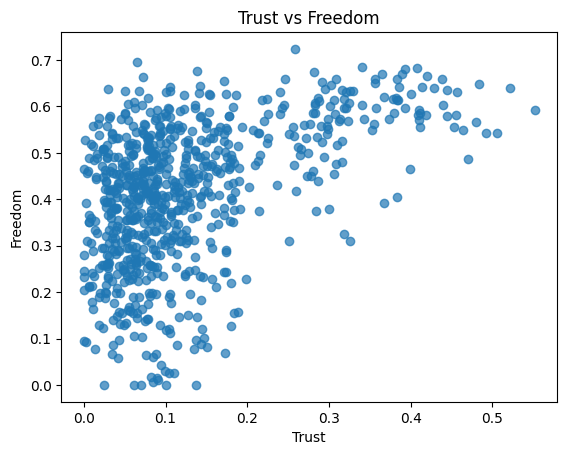

In [31]:
plt.scatter(df['Trust (Government Corruption)'], df['Freedom'], alpha=0.7)

plt.title('Trust vs Freedom')
plt.xlabel('Trust')
plt.ylabel('Freedom')
plt.show()

The scatterplot reveals a concentration of countries where freedom ranges between 0.3 and 0.5, but trust in government remains overwhelmingly low (below 0.1) for most. This indicates that in many nations, people perceive high levels of government corruption yet still report moderate levels of personal freedom. While there is a slight positive trend between trust and freedom—suggesting that higher trust is often associated with greater freedom—the vast majority of countries exhibit distrust in their governments. This pattern highlights that trust in government is not a universal requirement for experiencing some degree of personal freedom, as other factors, such as cultural values or local governance policies, might play a compensatory role.

According to a [Pew Research Center report on global views of democracy](https://www.pewresearch.org/short-reads/2020/02/27/how-people-around-the-world-see-democracy-in-8-charts/), the observations in this scatterplot are further supported by findings that in well-established democracies with strong institutional freedoms, people often exhibit extreme distrust in government. The report notes that in countries like the United States and France, public trust in government remains low despite these nations having long histories of stable democratic systems. This reinforces the idea that personal freedoms can persist independently of high trust in government, particularly in societies where democratic norms and individual liberties are deeply ingrained.

4. Family vs Freedom

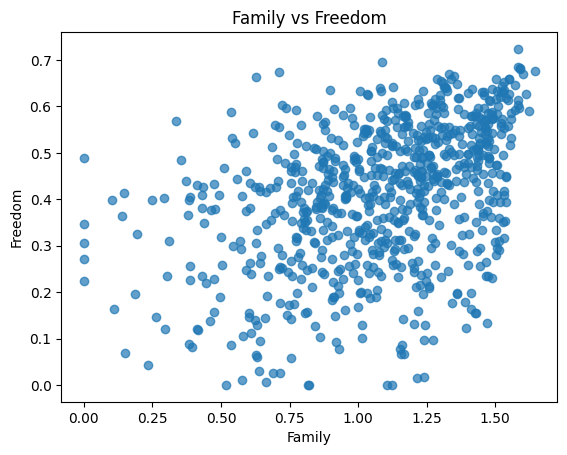

In [32]:
plt.scatter(df['Family'], df['Freedom'], alpha=0.7)

plt.title('Family vs Freedom')
plt.xlabel('Family')
plt.ylabel('Freedom')
plt.show()

This scatterplot shows a positive relationship between family support and perceived freedom. Countries with stronger family support (higher Family scores) tend to report higher levels of personal freedom. However, the data also shows some dispersion, at areas like lower Family scores, indicating that while family support contributes to freedom, other factors like cultural or governmental influences may also play a role. The clustering at higher Family scores and moderate-to-high Freedom scores suggests that family support is a key factor in fostering a sense of personal autonomy in many countries.

Research supports this observation. A study published in the Journal of Child and Family Studies found that supportive family environments help individuals develop a stronger sense of autonomy and well-being. Adolescents who perceived high levels of parental support reported feeling more independent and capable of making their own choices. This aligns with the chart, as countries with higher family support often report greater personal freedom, highlighting how strong family connections foster a sense of security and autonomy regardless of cultural or economic differences.

5. Family vs Health

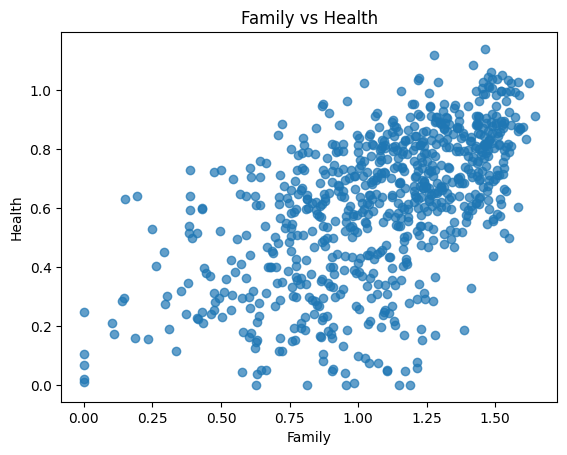

In [33]:
plt.scatter(df['Family'], df['Health (Life Expectancy)'], alpha=0.7)

plt.title('Family vs Health')
plt.xlabel('Family')
plt.ylabel('Health')
plt.show()

This scatterplot visualizes the relationship between Family (social support) and Health (life expectancy) scores for various countries. The positive correlation observed suggests that countries with stronger family and social support networks tend to report higher life expectancy. This relationship underscores the interdependence of emotional and physical well-being, where social connections may contribute to healthier behaviors and reduced stress levels, ultimately enhancing life expectancy.

While most data points cluster around mid-to-high scores for both variables, some outliers are noticeable:

- Countries with low family support and low life expectancy likely represent regions with weaker healthcare systems and limited social safety nets.

- Conversely, some countries show high family support but relatively low health outcomes, potentially reflecting robust social cultures but limited healthcare infrastructure or resources.

This graph highlights the importance of incorporating both health and social dimensions into happiness modeling and policy design, as they collectively contribute to a nation’s overall well-being.


6. Hapiness Rank vs Family

Hapiness Rank:
* 0: Not in the "Top 20" Countries for happiness
* 1: Within the "Top 20" Countries for happiness

<ipython-input-34-935c8bb7c0fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=output, y=df['Family'], palette='Set1')


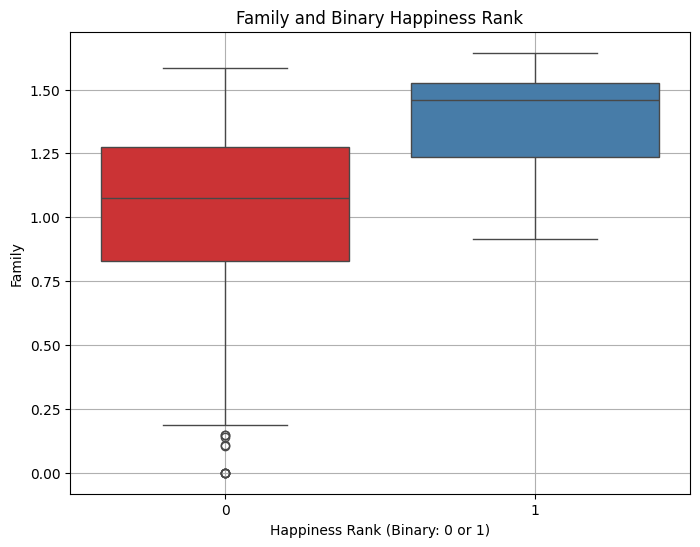

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=output, y=df['Family'], palette='Set1')
plt.title('Family and Binary Happiness Rank')
plt.xlabel('Happiness Rank (Binary: 0 or 1)')
plt.ylabel('Family')
plt.grid(True)
plt.show()

This boxplot compares the "Family" variable between countries ranked in the top 20 for happiness (Binary Happiness Rank = 1) and those not in the top 20 (Binary Happiness Rank = 0). The visualization shows that countries in the top 20 tend to have higher median Family scores, with fewer outliers on the lower end. In contrast, countries outside the top 20 exhibit a wider spread in Family scores, with some countries having significantly lower Family values. This suggests that stronger family support is associated with higher happiness rankings, reinforcing the idea that social support systems play a crucial role in national happiness levels.

According to the [Harvard Study of Adult Development](https://news.harvard.edu/gazette/story/2017/04/over-nearly-80-years-harvard-study-has-been-showing-how-to-live-a-healthy-and-happy-life/), strong social relationships, including those provided by family and close friends, are one of the most consistent predictors of happiness and well-being over a lifetime. The study found that individuals who reported having reliable and supportive relationships experienced better mental and physical health, as well as greater overall life satisfaction. This aligns with the observations from the boxplot, as the higher median Family scores among the top 20 happiest countries suggest that strong social networks contribute significantly to national happiness. The Harvard study's emphasis on the profound impact of supportive relationships reinforces the idea that fostering family support is essential for achieving greater happiness at both individual and societal levels.

7. Hapiness Rank vs Economy

<ipython-input-35-895dfb784231>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=output, y=df['Economy (GDP per Capita)'], palette='Set1')


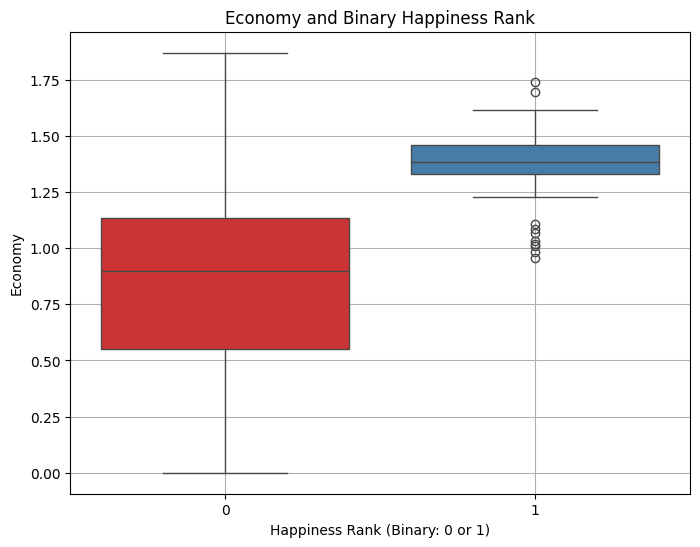

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=output, y=df['Economy (GDP per Capita)'], palette='Set1')
plt.title('Economy and Binary Happiness Rank')
plt.xlabel('Happiness Rank (Binary: 0 or 1)')
plt.ylabel('Economy')
plt.grid(True)
plt.show()

This boxplot compares the "Economy" variable, measured as GDP per capita, between countries ranked in the top 20 for happiness (Binary Happiness Rank = 1) and those not in the top 20 (Binary Happiness Rank = 0). The visualization reveals that top-ranked countries (blue box) have consistently higher GDP per capita, with a narrower interquartile range and fewer outliers. In contrast, countries outside the top 20 (red box) show a much wider range of GDP per capita, with significantly lower median values and greater variability. This suggests that economic prosperity is a key factor contributing to higher happiness rankings, as wealthier nations typically provide better access to resources and opportunities that enhance overall well-being. However, the presence of outliers indicates that high GDP alone does not guarantee happiness, as other factors such as social support and governance also play a role.

[Research from the Wharton School of Business](https://knowledge.wharton.upenn.edu/article/does-money-buy-happiness-heres-what-the-research-says/) supports the idea that money contributes to happiness, but only up to a certain point. The article explains that money significantly improves happiness when it allows individuals to meet their basic needs and maintain a comfortable standard of living. However, beyond a certain threshold—where basic needs are already met—additional wealth yields diminishing returns in terms of happiness. This aligns with the observations from the boxplot, where high GDP per capita is associated with higher happiness rankings but does not guarantee universal happiness for all wealthy countries. It underscores the importance of non-economic factors, such as social relationships and governance, in shaping national and individual well-being.

8. Hapiness Rank vs Health

<ipython-input-36-1d7291c9531e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=output, y=df['Health (Life Expectancy)'], palette='Set1')


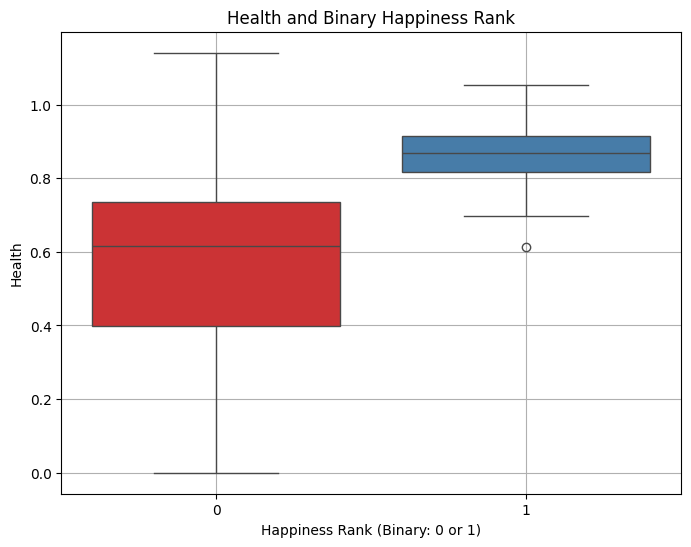

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=output, y=df['Health (Life Expectancy)'], palette='Set1')
plt.title('Health and Binary Happiness Rank')
plt.xlabel('Happiness Rank (Binary: 0 or 1)')
plt.ylabel('Health')
plt.grid(True)
plt.show()

This boxplot compares the "Health (Life Expectancy)" scores between countries ranked in the top 20 for happiness (Happiness Rank = 1) and those not in the top 20 (Happiness Rank = 0). The y-axis represents the Health scores, while the x-axis categorizes countries into two groups: "Top 20" and "Not Top 20."

Countries ranked in the top 20 for happiness exhibit consistently higher median health (life expectancy) scores, with a narrower interquartile range and fewer outliers. This indicates that a long and healthy life is a significant contributor to overall happiness. The bottom 80 countries display a wider spread in health scores, with many countries showing substantially lower values.

This aligns with the notion that better health infrastructure, nutrition, and access to healthcare services—often associated with wealthier nations—play a vital role in both individual and societal well-being. Research supports this finding: higher life expectancy is linked to reduced mortality rates, fewer years spent in disability, and an improved quality of life. However, some outliers suggest that other factors, such as social support and cultural resilience, can offset health disadvantages to some extent.


9. Hapiness Rank vs Freedom

<ipython-input-37-6dca185e4150>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=output, y=df['Freedom'], palette='Set1')


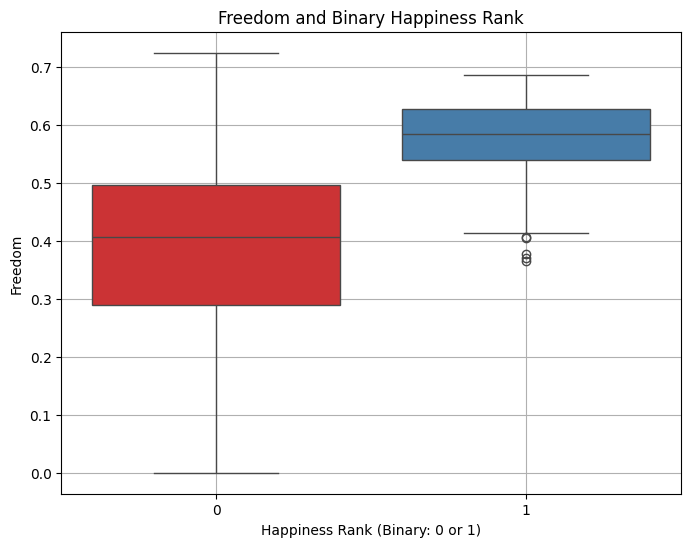

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=output, y=df['Freedom'], palette='Set1')
plt.title('Freedom and Binary Happiness Rank')
plt.xlabel('Happiness Rank (Binary: 0 or 1)')
plt.ylabel('Freedom')
plt.grid(True)
plt.show()

This boxplot visualizes the "Freedom" scores for countries ranked in the top 20 for happiness compared to those not in the top 20. Freedom measures the extent to which people feel autonomous in their life choices.

The data reveals that countries in the top 20 for happiness generally score significantly higher on freedom, with a tighter distribution of scores around the median. In contrast, countries outside the top 20 have a much broader range of freedom scores, with many countries scoring considerably lower.

This suggests that autonomy in personal and societal decision-making is a critical factor in fostering happiness. Democratic governance, economic freedom, and personal liberties likely contribute to this trend. However, the variability in freedom scores among countries outside the top 20 indicates that other factors, such as social support or economic conditions, may compensate for lower autonomy in some cases. For instance, countries with collectivist cultures may report happiness despite lower levels of individual freedom due to strong communal ties.


10. Hapiness Rank vs Trust

<ipython-input-38-3a85445d0383>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=output, y=df['Trust (Government Corruption)'], palette='Set1')


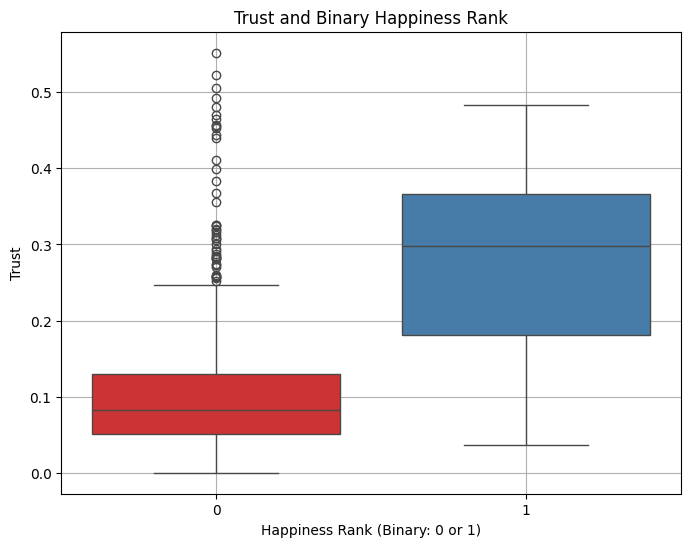

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=output, y=df['Trust (Government Corruption)'], palette='Set1')
plt.title('Trust and Binary Happiness Rank')
plt.xlabel('Happiness Rank (Binary: 0 or 1)')
plt.ylabel('Trust')
plt.grid(True)
plt.show()

This boxplot compares the levels of "Trust (Government Corruption)" between countries ranked in the top 20 for happiness and those not in the top 20. Trust measures the perceived level of corruption in government and institutions.

Countries in the top 20 for happiness generally exhibit higher levels of trust in government, with a median trust score that is noticeably higher than that of countries outside the top 20. Additionally, the interquartile range is narrower for the top 20 countries, suggesting more consistency in trust levels. In contrast, countries outside the top 20 show a broader spread of trust scores, with many scoring extremely low.

This observation emphasizes the importance of institutional trust in fostering societal happiness. Low corruption levels often correlate with equitable governance, economic stability, and enhanced social cohesion. On the other hand, pervasive corruption can erode public confidence, hinder development, and increase societal dissatisfaction. However, some outliers demonstrate that trust alone is not sufficient; other factors, such as economic performance or cultural resilience, can also influence happiness.


# **Feature** **Engineering**

We wanted to perform the feature engineering steps that where not included in the preprocessing section. We were happy with our existing features after cleaning the raw data so we didn't see the need to create new features, but just to adjust existing ones to enhance the model's performance.

**1. Scaling Data**

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [40]:
df.head(10)

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
651,1.009850,1.259976,0.625131,0.561213,0.073654,0.490864,False,False,False,False,False,False,False,True,False,False
418,0.186000,0.541000,0.306000,0.531000,0.080000,0.210000,False,False,False,False,False,False,False,False,True,False
470,0.878115,0.774864,0.597711,0.408158,0.087763,0.032210,False,False,False,False,True,False,False,False,False,False
321,1.251140,1.197770,0.954460,0.262360,0.029010,0.228230,False,False,False,False,False,False,False,False,False,True
679,1.368000,1.430000,0.914000,0.351000,0.097000,0.242000,False,False,True,False,False,False,False,False,False,False
95,1.004000,1.439000,0.802000,0.390000,0.086000,0.099000,False,False,False,True,False,False,False,False,False,False
584,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,False,False,False,False,False,False,False,False,True,False
656,0.605000,1.240000,0.312000,0.016000,0.082000,0.134000,False,False,False,False,False,False,False,False,True,False
100,1.113060,0.925420,0.678060,0.212190,0.006150,0.127930,False,True,False,False,False,False,False,False,False,False
671,1.452000,1.526000,1.052000,0.572000,0.343000,0.263000,False,False,False,False,False,False,False,False,False,True


**2. Dealing with Skew Distribution**

In [41]:
df.skew()

,0
Economy (GDP per Capita),-0.331837
Family,-0.685312
Health (Life Expectancy),-0.498489
Freedom,-0.504674
Trust (Government Corruption),1.523969
Generosity,1.039163
Region_Australia and New Zealand,8.619891
Region_Central and Eastern Europe,1.608518
Region_Eastern Asia,4.963232
Region_Latin America and Caribbean,2.060499


There's no variables that have significant skewness.

# **Modeling**

We are splitting the data into training (80%) and test (20%).

In [42]:
n = len(df)
percent = int(0.8 * n)

In [43]:
features = df.columns
x = df[list(features)][:percent]
y = output[:percent]

In [44]:
x_test = df[list(features)][percent:]
y_test = output[percent:]

# **Random Forest**

In [45]:
rfc = RandomForestClassifier()

In [46]:
rfc.fit(x,y)

RandomForestClassifier()

In [47]:
preds_rfc = rfc.predict(x_test)

In [48]:
accuracy_score(y_true = y_test, y_pred = preds_rfc)

0.9805194805194806

**Test Sample**

We assigned imaginary country values similar to those typically seen in top-performing countries on this list—closely resembling America's in a given year. Its GDP is notably high for this dataset. However, let's observe what happens if the country scores poorly on freedom.

In [49]:
#USA HAPPINESS DATA 2024 (RANKED #23 - NOT IN TOP 20)
data = {
       'Economy (GDP per Capita)':1.939, 'Family':1.392, 'Health (Life Expectancy)':0.542,
       'Freedom':0.586, 'Trust (Government Corruption)':0.169, 'Generosity':0.223,
       'Region_Australia and New Zealand':0, 'Region_Central and Eastern Europe':0,
       'Region_Eastern Asia':0, 'Region_Latin America and Caribbean':0,
       'Region_Middle East and Northern Africa':0, 'Region_North America':1,
       'Region_Southeastern Asia':0, 'Region_Southern Asia':0,
       'Region_Sub-Saharan Africa':0, 'Region_Western Europe':0,
}
x_test_new = pd.DataFrame(data=data, index = [0])

In [50]:
rfcprediction = rfc.predict(x_test_new)
print("Random Forest Prediction:", rfcprediction)

Random Forest Prediction: [0]


In [51]:
actual_label = 0

# Check if the prediction matches the actual label
if rfcprediction == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Prediction is correct!


In [52]:
importances = rfc.feature_importances_
features = x.columns  # Assuming `x` is your training data with feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

                                   Feature  Importance
4            Trust (Government Corruption)    0.211818
2                 Health (Life Expectancy)    0.167328
0                 Economy (GDP per Capita)    0.158721
3                                  Freedom    0.123440
5                               Generosity    0.094860
1                                   Family    0.094419
15                   Region_Western Europe    0.068861
11                    Region_North America    0.020745
10  Region_Middle East and Northern Africa    0.016694
8                      Region_Eastern Asia    0.010027
12                Region_Southeastern Asia    0.010025
9       Region_Latin America and Caribbean    0.008736
6         Region_Australia and New Zealand    0.008678
7        Region_Central and Eastern Europe    0.004290
14               Region_Sub-Saharan Africa    0.001350
13                    Region_Southern Asia    0.000007


Random Forest can predict the same as a Decision Tree because it aggregates predictions from multiple decision trees, reducing the impact of overfitting and improving generalization. Both models may identify GDP as a significant predictor due to its strong correlation with happiness rankings, but they also rely on other features like freedom, health, and regional factors. In both models, GDP alone isn't sufficient to determine happiness rankings, as countries with high GDP but low freedom or poor health outcomes can still rank outside the top 20. Random Forest excels by considering the collective importance of all features, ensuring predictions are influenced by a combination of factors rather than GDP alone.

# **Decision Tree**

We optimize the decision tree's max_depth by testing various values and selecting the one yielding the highest accuracy.

In [53]:
# Initialize an empty list to store accuracy scores
accuracies = []
# Loop through depths from 1 to 3 to test different tree depths
for i in np.arange(1,4): #Want to make it read-able, so beyond 4 is too much
    max_depth = i # Set the current tree depth
    print('max_depth :', i)
# Create and train a Decision Tree Classifier with the specified depth
    dtc = DecisionTreeClassifier(max_depth = max_depth)
    dtc.fit(x,y)
# Predict labels for the test data
    pred = dtc.predict(x_test)
    print(accuracy_score(y_true = y_test, y_pred = pred))
# Store the accuracy score in the list
    accuracies.append(accuracy_score(y_true = y_test, y_pred = pred))
# Find the maximum accuracy and its corresponding depth
best = np.max(accuracies)
best_depth = np.where(accuracies == best)[0][0]
# Train a final Decision Tree Classifier with the optimal depth
dtc = DecisionTreeClassifier(max_depth = best_depth)
dtc.fit(x,y)

max_depth : 1
0.922077922077922
max_depth : 2
0.922077922077922
max_depth : 3
0.9675324675324676


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Economy (GDP per Capita) <= 1.324\ngini = 0.211\nsamples = 616\nvalue = [542, 74]\nclass = Not Top 20'),
 Text(0.25, 0.5, 'Health (Life Expectancy) <= 0.814\ngini = 0.065\nsamples = 509\nvalue = [492, 17]\nclass = Not Top 20'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.014\nsamples = 436\nvalue = [433, 3]\nclass = Not Top 20'),
 Text(0.375, 0.16666666666666666, 'gini = 0.31\nsamples = 73\nvalue = [59, 14]\nclass = Not Top 20'),
 Text(0.75, 0.5, 'Region_Western Europe <= 0.5\ngini = 0.498\nsamples = 107\nvalue = [50.0, 57.0]\nclass = Top 20'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.389\nsamples = 53\nvalue = [39, 14]\nclass = Not Top 20'),
 Text(0.875, 0.16666666666666666, 'gini = 0.324\nsamples = 54\nvalue = [11, 43]\nclass = Top 20')]

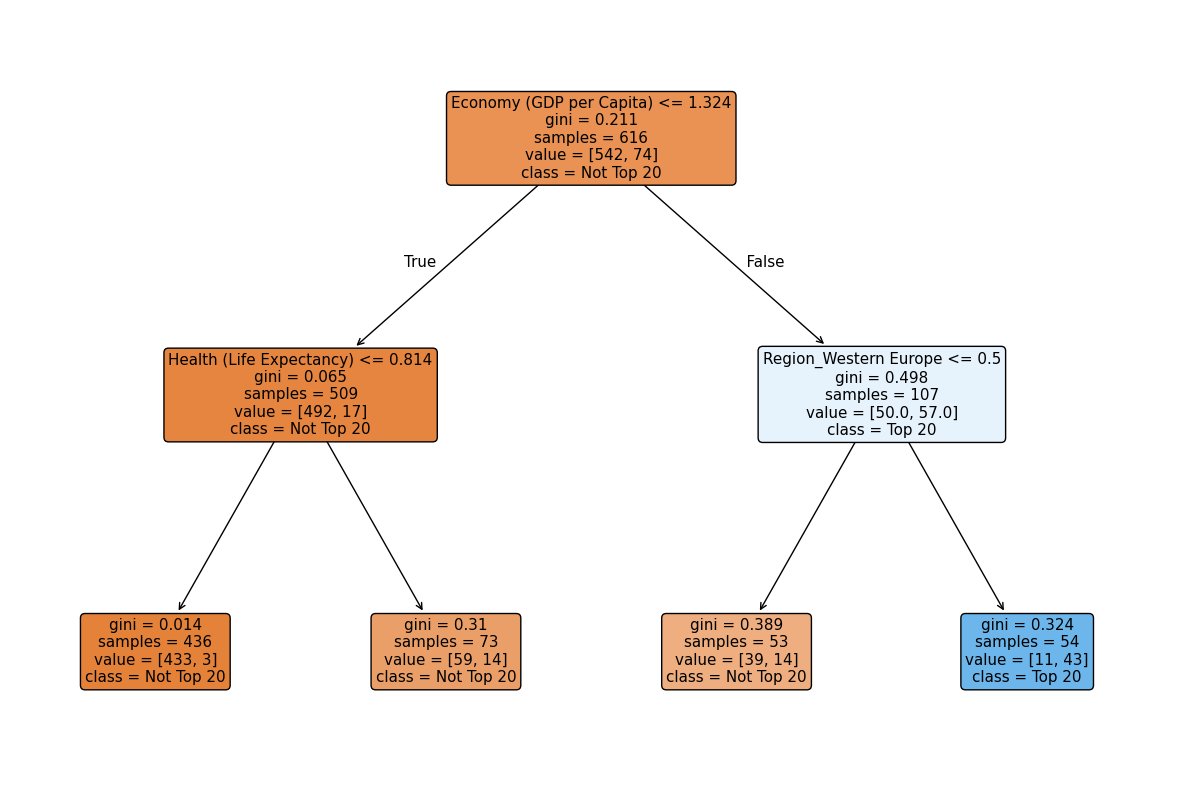

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Decision tree classifier trained with the optimal depth
plot_tree(dtc, feature_names = features, class_names = ['Not Top 20', 'Top 20'],  # 0 -> not top 25, 1 -> top 25
          filled=True, rounded = True)



1.   Economy (GDP per Capita) is the most critical factor. Countries with values ≤ 1.29 are likely not in the top 20 for happiness.
2. Region (Australia and New Zealand) further splits lower-GDP countries. Countries in this region are more likely to be happier.
3. Freedom is decisive for high-GDP countries, with higher freedom increasing the chance of being in the top 20.



In [55]:
preds_dtc = dtc.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_true = y_test, y_pred = preds_dtc)

0.922077922077922

**Observation**: The accuracy score indicates that the decision tree performs well in predicting whether a country ranks in the top 20 for happiness.
The model is likely good at capturing patterns in the dataset. However, accuracy alone isn't enough to judge its effectiveness.

In [58]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_true=y_test, y_pred=preds_dtc)
recall = recall_score(y_true=y_test, y_pred=preds_dtc)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9333333333333333
Recall: 0.56


Precision: Tells how many predicted positives (e.g., "Top 20") are actually correct. High precision means fewer false positives.
* Focus: Model's reliability in positive predictions.

Recall: Measures how many actual positives (e.g., true "Top 20") are correctly identified. High recall means fewer false negatives.
* Focus: Model's sensitivity to capturing true positives.

Together, they show the balance between accuracy in predictions (precision) and completeness in identifying positives (recall).

**Observation**: The model is better at identifying true positives, "Top 20" Countries (high recall), than avoiding false positives (lower precision).
* Since the goal is to prioritize finding as many true positives as possible (e.g., ensuring no country deserving of "Top 20" is missed), this performance is acceptable.
* However, if avoiding false positives (e.g., not labeling countries as "Top 20" incorrectly) was significantly crucial, the model would need improvement in precision.

**Test** **Sample**

In [59]:
dtprediction = dtc.predict(x_test_new) # a 0 implies that the country is *not* in the top 20 for happiness

In [60]:
actual_label = 0

# Check if the prediction matches the actual label
if dtprediction == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Prediction is correct!


As the tree would imply, even if the country is rich, if it is low scoring for freedom it is likely to still not be a top 20 country in happiness.

Other observations:

1. The GDP of a country appears to play a significant role in determining its happiness.
2. For countries with a GDP below 1.3 (which is just under the score the Czech Republic achieved in 2017, meaning countries below 1.3. generally have lower wealth), whether the country is located in the Australia & New Zealand region is a strong predictor of whether it will be ranked outside the top 20.

Overall it seems to imply that:

1. Being located in the Australia & New Zealand region is a strong indicator of happiness, likely because both Australia and New Zealand consistently perform well in happiness rankings, even with lower GDPs. This implies that, for the most part, only Australia and New Zealand achieve top 20 happiness rankings despite having lower GDP scores. The decision tree essentially states that if a country is not in this region and its GDP is below 1.3, it will not make the top 20.
2. Countries with a GDP above 1.3 and a freedom score above 0.506 are generally ranked in the top 20 for happiness. However, countries with high GDP scores but freedom scores below 0.506 are almost eight times more likely to fall outside the top 20.

# **Logistic Regression**

In [61]:
logit = LogisticRegression()

In [62]:
logit.fit(x,y)

LogisticRegression()

In [63]:
preds_logit = logit.predict(x_test)

In [64]:
accuracy_score(y_true = y_test, y_pred = preds_logit)

0.987012987012987

**Test Sample**

In [65]:
lrprediction = logit.predict(x_test_new)
print("Logistic Regression Prediction:", lrprediction)

Logistic Regression Prediction: [1]


In [66]:
# Check if the prediction matches the actual label
if lrprediction == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Prediction is incorrect.


Logistic Regression may get this scenario wrong because it assumes a linear relationship between the features and the outcome, which might oversimplify complex interactions in the data. Unlike Decision Trees and Random Forests, which capture non-linear patterns and feature interactions (e.g., the combined effect of GDP and freedom), Logistic Regression struggles when features like freedom or regional factors interact in non-linear ways. This limitation can cause Logistic Regression to miss nuanced relationships, such as a high GDP not compensating for poor freedom scores, which Random Forest and Decision Tree models are better equipped to recognize.

# **K-Nearest Neighbor**


We start off by running 5-fold cross validation, which splits the dataset into 5 folds. The reason we run cross validation is to ensure that the model is tested on various subsets of the data so that we can evaluate how well the model generalizes to unseen data. By ensuring the model is tested on various subsets of the data, cross-validation prevents the model from being overly tuned to specific subsets of the data, which could happen if we relied on a single train-test split. Thus, for each k value, the data is shuffled and split into training and validation subsets. Shuffling the data ensures randomness in the cross-validation splits, reducing potential biases from the dataset's ordering. The model is then evaluated on each fold, and the average accuracy across folds is computed.

In [67]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def cross_validation(x, y, k_values, n_folds=5):
    """
    x: Feature data
    y: Target labels
    k_values: List of k values to try.
    n_folds: Number of folds for cross-validation.
    """
    # Shuffle data for reproducibility
    indices = np.arange(len(x))
    np.random.shuffle(indices)


    # Randomize data
    x = x.iloc[indices].reset_index(drop=True)
    y = y.iloc[indices].reset_index(drop=True)

    # Generate folds
    n_samples = len(x)
    fold_size = n_samples // n_folds

    # Accuracy results for each k value
    results = {k: [] for k in k_values}

    for k in k_values:
        for fold in range(n_folds):
            # Define training and validation sets split for this fold
            start = fold * fold_size
            end = (fold + 1) * fold_size

            # Split the data into training and validation sets
            x_train = pd.concat([x.iloc[:start], x.iloc[end:]]).reset_index(drop=True)
            y_train = pd.concat([y.iloc[:start], y.iloc[end:]]).reset_index(drop=True)
            x_val = x.iloc[start:end].reset_index(drop=True)
            y_val = y.iloc[start:end].reset_index(drop=True)

            # Train KNN model for this fold
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(x_train, y_train)

            # Predict + evaluate
            y_pred = knn.predict(x_val)
            accuracy = accuracy_score(y_val, y_pred)

            results[k].append(accuracy)

    # Calculate average accuracy for each k value
    average_accuracies = {k: np.mean(scores) for k, scores in results.items()}

    return average_accuracies

# Try k values from 1 to 20
k_values = np.arange(1, 21)
# Set a seed for reproducibility
np.random.seed(42)
average_accuracies = cross_validation(x, y, k_values)

# Results
for k, accuracy in average_accuracies.items():
    print(f"k={k}: Average Accuracy = {accuracy}")

best_k = max(average_accuracies, key=average_accuracies.get)
print(f"Best k value: {best_k}")

k=1: Average Accuracy = 0.9414634146341463
k=2: Average Accuracy = 0.959349593495935
k=3: Average Accuracy = 0.9495934959349593
k=4: Average Accuracy = 0.9560975609756097
k=5: Average Accuracy = 0.9577235772357723
k=6: Average Accuracy = 0.9626016260162602
k=7: Average Accuracy = 0.9609756097560975
k=8: Average Accuracy = 0.9577235772357723
k=9: Average Accuracy = 0.9577235772357724
k=10: Average Accuracy = 0.9577235772357723
k=11: Average Accuracy = 0.9577235772357724
k=12: Average Accuracy = 0.959349593495935
k=13: Average Accuracy = 0.9577235772357724
k=14: Average Accuracy = 0.9577235772357724
k=15: Average Accuracy = 0.9577235772357724
k=16: Average Accuracy = 0.9544715447154472
k=17: Average Accuracy = 0.9560975609756099
k=18: Average Accuracy = 0.9560975609756099
k=19: Average Accuracy = 0.9544715447154472
k=20: Average Accuracy = 0.9560975609756099
Best k value: 6


We’ve decided to use accuracy to select our k-value because it provides a clear measure of the model's predictive capability, captures the trade-off between bias and variance for different k-values, and aligns with the goal of selecting a well-generalized model for this dataset. Usually a small k number of neighbors gives low bias but high variance, potentially overfitting the model to the training data and leading to poor generalization, whereas a large k number of neighbors would give a higher bias but lower variance, averaging over more neighbors. This can underfit and oversimplify the data structure.

In [68]:
print(f"As can be seen from cross validation above, the k-value that generates the highest accuracy is k={best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)

As can be seen from cross validation above, the k-value that generates the highest accuracy is k=6


In [69]:
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

In [70]:
preds_knn = knn.predict(x_test)
print(preds_knn)

[0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [71]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_true=y_test, y_pred=preds_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.974025974025974


**Test Sample**

In [72]:
# Test sample with 'data' from above
knnpredicted = knn.predict(x_test_new)[0]
print("KNN Prediction:", knnpredicted)

KNN Prediction: 1


In [73]:
# Check if the prediction matches the actual label
if knnpredicted == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Prediction is incorrect.


KNN’s focus on neighboring data points makes it well-suited for the World Happiness dataset because the features in the dataset inherently reflect shared socioeconomic and cultural traits that naturally group similar countries together in the feature space, i.e., since countries with similar feature values (e.g., high GDP, strong social support, high life expectancy) are likely to have comparable happiness scores, they naturally form "clusters" in the feature space. This alignment makes KNN not only an effective baseline model but also an interpretable tool for uncovering patterns in global happiness.

**Observation**: However, KNN might not be as precise because it relies on the proximity of the test sample to its nearest neighbors in feature space. If the imaginary country's feature values (e.g., high GDP but low freedom) are closer to countries in the dataset that are not representative of its true class, KNN may misclassify it. Unlike Random Forest and Decision Trees, KNN doesn't inherently prioritize important features like GDP or freedom, treating all features equally, which can lead to errors when some features have stronger predictive power than others.

# **Lasso**

This section is the standard application of Lasso (heavily parallels process used in HW Assignment 1, although differs in some ways).

1. **It begins by importing the correct libraries**

  a.) Lasso regression model  from Scikit-Learn, which performs regression while selecting only the most relevant features (shrinking less important ones to zero).

  b.) mean_squared_error, which as we know is a function to calculate the Mean Squared Error (MSE), which measures how far predictions are from actual values.

2. **Define Dataset Length and Split Percentage:**

  a.) n: Total number of samples in the dataset.

  b.) percent: 80% of the data is used for training, calculated as int(0.8 * n).

3. **Split Data into Training and Testing Sets:**

  a.) x_train and y_train: The first 80% of the data (features and target) used for training the model.

  b.) x_test and y_test: The remaining 20% of the data used to test the model's performance/predictions.

4. **Generate a Range of Alpha Values:**

  a.) alphas: A logarithmically spaced range of 50 alpha values between
10^-4 and 10^1. The alpha parameter controls the strength of regularization, where higher values increase regularization, shrinking more coefficients to zero.

5. **Iterate Through Alphas to Find the Best Model:**

  a.) For each alpha:


*   Instantiate a Lasso model with Lasso(alpha=alpha).
*   Train the model using .fit(x_train, y_train).
*   Predict on the test data with lasso.predict(x_test).
*   Calculate the MSE for the predictions using mean_squared_error(y_test, y_test_pred).

  b.) Track the best_alpha and lowest_mse:



*   If the current alpha produces a lower MSE than the previous lowest, update best_alpha and lowest_mse.

6. **Refit the Best Model:**

  a.) After determining the best alpha, instantiate a new Lasso model with Lasso(alpha=best_alpha).

  b.) Fit the model using .fit(x_train, y_train) for final training.


7. **Evaluate Feature Importance:**

  a.) lasso.coef_: Outputs the coefficients of the model. Non-zero coefficients indicate features included in the model, while zero coefficients indicate excluded features. Features with larger absolute coefficients have a greater impact on predictions.

8. **Output Results:**

  a.) Print the best_alpha and the corresponding lowest_mse to summarize the best model's performance.

  b.) Display the feature coefficients to interpret which features were most influential.


In [74]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
n = len(x)
percent = int(0.8 * n)

x_train = x[:percent]
y_train = y[:percent]
x_test = x[percent:]
y_test = y[percent:]

# Generate a range of alpha values to test
alphas = np.logspace(-4, 1, 50) # 50 values between 10^-5 and 10^1

# Initialize variables to track the best alpha and its corresponding MSE
best_alpha = None
lowest_mse = float('inf')

# Loop through each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)

    # Predict and calculate MSE for the test data
    y_test_pred = lasso.predict(x_test)
    mse = mean_squared_error(y_test, y_test_pred)

    # Update best_alpha if this alpha produces a lower MSE
    if mse < lowest_mse:
        best_alpha = alpha
        lowest_mse = mse

print(f"Best Alpha: {best_alpha}")
print(f"Lowest MSE: {lowest_mse}")

# Refit the Lasso model using the best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)

# Output the coefficients to understand feature importance
print("Lasso Coefficients with Best Alpha:", lasso.coef_)


Best Alpha: 0.0005179474679231213
Lowest MSE: 0.03801028798530734
Lasso Coefficients with Best Alpha: [ 0.04352652  0.0786947   0.12125364  0.17197541  0.60753143  0.30002732
  0.51302876 -0.04095102 -0.11530312  0.01355113 -0.          0.67012276
 -0.18009536 -0.08877743  0.          0.29048836]


**Test Sample**

The test section goes as follows:

1. **Define a Test Sample:**

  a.) x_test_new: A custom sample created earlier, containing hypothetical values for the features. This represents a new data point to test how the model performs.

  b.) lasso.predict(x_test_new)[0]: Predicts the target value (whether the sample is in the top 20 for happiness or not) using the trained model.


2. **Print the Prediction for the Test Sample:**

  a.) Outputs the prediction made by the model for the custom sample.


3. **Compare with the Actual Label (Optional):**

  a.) actual_label: Represents the true value for the test sample (if known). For example, 1 if the country is in the top 20, or 0 otherwise.

  b.) The comparison checks if the model's prediction matches the actual value, printing whether the prediction is correct or incorrect.

In [75]:
# test sample for prediction uses the "data" from earlier

# make a prediction for the test sample
lssprediction = lasso.predict(x_test_new)[0]
print("Lasso Prediction for Test Sample:", lssprediction)

Lasso Prediction for Test Sample: 0.8888235486860662


In [76]:
# Check if the prediction matches the actual label
if lssprediction == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Prediction is incorrect.


Lasso (Least Absolute Shrinkage and Selection Operator) might get the prediction wrong because it uses regularization to shrink the coefficients of less important features, potentially eliminating key variables or reducing their impact. While Lasso is effective in feature selection, it assumes that the relationship between features and the outcome is linear, which may not capture complex, non-linear interactions between features like GDP and freedom. In cases where certain features, such as freedom, interact in a non-linear way with GDP or other factors, Lasso might underperform, missing these interactions that models like Decision Trees and Random Forests can capture. This simplification can lead to inaccurate predictions, especially when the true relationship is more nuanced than a linear model can represent.

# **Nested CV**

To further enhance the performance of our models, we performed hyperparameter optimization using GridSearchCV. This automates the process of systematically exploring for the best combination of hyperparameter settings for each model, helping us discover the model configurations that yield the most accurate predictions on our happiness dataset.

**Process**
1. Defining Hyperparameter Grids:
<br>We will be evaluating Decision Tree, Random Forest, Logistic Regression, KNN, and Lasso. For each model, we defined a grid of hyperparameter values to explore. This grid specifies the range or list of values for each hyperparameter that will be considered during the search.

2. Cross-Validation:
<br>GridSearchCV divides the training data into multiple folds and trains the model with the given hyperparameters on a subset of the data while evaluating its performance on the remaining fold.

3. Evaluation Metric:
<br>We specify an evaluation metric that GridSearchCV uses to assess the performance of each hyperparameter combination and choose hyperparameter values that maximize the chosen evaluation metric across all cross-validation folds.

In [77]:

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, mean_squared_error

# Nested Cross-Validation Implementation
def nested_cross_validation(x, y, knn_model, tree_model, lasso_model, random_forest_model, logistic_model):
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define model hyperparameters for tuning
    param_grid_knn = {'n_neighbors': range(1, 21)}
    param_grid_tree = {'max_depth': range(1, 5)}
    param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
    param_grid_logistic = {'C': [0.1, 1, 10]}

    # Perform Nested CV
    outer_results = []
    for train_idx, test_idx in outer_cv.split(x, y):
        # Split into train/test for the outer fold
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Perform Grid Search with inner CV
        knn_search = GridSearchCV(knn_model, param_grid_knn, cv=inner_cv, scoring='accuracy')
        tree_search = GridSearchCV(tree_model, param_grid_tree, cv=inner_cv, scoring='accuracy')
        lasso_search = GridSearchCV(lasso_model, param_grid_lasso, cv=inner_cv, scoring='neg_mean_squared_error')
        rf_search = GridSearchCV(random_forest_model, param_grid_rf, cv=inner_cv, scoring='accuracy')
        logistic_search = GridSearchCV(logistic_model, param_grid_logistic, cv=inner_cv, scoring='accuracy')

        # Fit models
        knn_search.fit(x_train, y_train)
        tree_search.fit(x_train, y_train)
        lasso_search.fit(x_train, y_train)
        rf_search.fit(x_train, y_train)
        logistic_search.fit(x_train, y_train)

        # Get the best model parameters
        best_knn = knn_search.best_estimator_
        best_tree = tree_search.best_estimator_
        best_lasso = lasso_search.best_estimator_
        best_rf = rf_search.best_estimator_
        best_logistic = logistic_search.best_estimator_

        # Evaluate each model on the outer test fold
        knn_acc = accuracy_score(y_test, best_knn.predict(x_test))
        tree_acc = accuracy_score(y_test, best_tree.predict(x_test))
        lasso_mse = mean_squared_error(y_test, best_lasso.predict(x_test))
        rf_acc = accuracy_score(y_test, best_rf.predict(x_test))
        logistic_acc = accuracy_score(y_test, best_logistic.predict(x_test))

        outer_results.append({
            'knn_accuracy': knn_acc,
            'tree_accuracy': tree_acc,
            'lasso_mse': lasso_mse,
            'rf_accuracy': rf_acc,
            'logistic_accuracy': logistic_acc
        })

    return outer_results


GridSearchCV identifies the hyperparameter combination that achieves the highest score on the chosen evaluation metric across all cross-validation folds, as generated below:

In [78]:
results = nested_cross_validation(x, y, knn, dtc, lasso, rfc, logit)
for i, result in enumerate(results, 1):
    print(f"Outer Fold {i}:")
    print(f"KNN Accuracy: {result['knn_accuracy']}")
    print(f"Decision Tree Accuracy: {result['tree_accuracy']}")
    print(f"Lasso MSE: {result['lasso_mse']}")
    print(f"Random Forest Accuracy: {result['rf_accuracy']}")
    print(f"Logistic Regression Accuracy: {result['logistic_accuracy']}")
    print()

Outer Fold 1:
KNN Accuracy: 0.9758064516129032
Decision Tree Accuracy: 0.9516129032258065
Lasso MSE: 0.03509103856197873
Random Forest Accuracy: 0.9758064516129032
Logistic Regression Accuracy: 0.967741935483871

Outer Fold 2:
KNN Accuracy: 0.967479674796748
Decision Tree Accuracy: 0.943089430894309
Lasso MSE: 0.05328528017607362
Random Forest Accuracy: 0.959349593495935
Logistic Regression Accuracy: 0.959349593495935

Outer Fold 3:
KNN Accuracy: 0.9512195121951219
Decision Tree Accuracy: 0.9186991869918699
Lasso MSE: 0.05850009994646345
Random Forest Accuracy: 0.9512195121951219
Logistic Regression Accuracy: 0.943089430894309

Outer Fold 4:
KNN Accuracy: 0.926829268292683
Decision Tree Accuracy: 0.926829268292683
Lasso MSE: 0.06485084884814328
Random Forest Accuracy: 0.9349593495934959
Logistic Regression Accuracy: 0.926829268292683

Outer Fold 5:
KNN Accuracy: 0.975609756097561
Decision Tree Accuracy: 0.9512195121951219
Lasso MSE: 0.03594457668904578
Random Forest Accuracy: 0.9837398

Once we have performed nested CV and obtained optimized hyperparameter settings for each of the five models, we can calculate the averages for each model to benchmark them against each other.

In [79]:
avg_knn_acc = sum(r['knn_accuracy'] for r in results) / len(results)
avg_tree_acc = sum(r['tree_accuracy'] for r in results) / len(results)
avg_lasso_mse = sum(r['lasso_mse'] for r in results) / len(results)
avg_lasso_accuracy = 1 - avg_lasso_mse
avg_rf_acc = sum(r['rf_accuracy'] for r in results) / len(results)
avg_logistic_acc = sum(r['logistic_accuracy'] for r in results) / len(results)

print(f"Average KNN Accuracy: {avg_knn_acc}")
print(f"Average Decision Tree Accuracy: {avg_tree_acc}")
print(f"Average Lasso Accuracy: {avg_lasso_accuracy}")
print(f"Average Random Forest Accuracy: {avg_rf_acc}")
print(f"Average Logistic Regression Accuracy: {avg_logistic_acc}")

Average KNN Accuracy: 0.9593889325990034
Average Decision Tree Accuracy: 0.938290060319958
Average Lasso Accuracy: 0.9504656311556591
Average Random Forest Accuracy: 0.9610149488591659
Average Logistic Regression Accuracy: 0.9528979805927091


In [80]:
if avg_knn_acc > avg_tree_acc and avg_knn_acc > avg_lasso_accuracy and avg_knn_acc > avg_rf_acc and avg_knn_acc > avg_logistic_acc:
    print("KNN has the best accuracy score.")
elif avg_tree_acc > avg_knn_acc and avg_tree_acc > avg_lasso_accuracy and avg_tree_acc > avg_rf_acc and avg_tree_acc > avg_logistic_acc:
    print("Decision Tree has the best accuracy score.")
elif avg_lasso_accuracy > avg_knn_acc and avg_lasso_accuracy > avg_tree_acc and avg_lasso_accuracy > avg_rf_acc and avg_lasso_accuracy > avg_logistic_acc:
    print("Lasso has the best accuracy score.")
elif avg_rf_acc > avg_knn_acc and avg_rf_acc > avg_tree_acc and avg_rf_acc > avg_lasso_accuracy and avg_rf_acc > avg_logistic_acc:
    print("Random Forest has the best accuracy score.")
else:
    print("Logistic Regression has the best accuracy score.")

Random Forest has the best accuracy score.


Based on the the scores above, we can see that Random Forest generated the best accuracy score of 96%. We then have KNN that followed very closely, and then Lasso Regression, both of which are within 95% accuracy. The model that generated the lowest accuracy was Decision Tree, with a score of 93%.

Random Forest's superior performance may be attributed to its ensemble nature. It combines predictions from multiple decision trees, each trained on a different subset of the data and with different features. This ensemble approach reduces overfitting, a common problem with individual decision trees, and improves generalization to unseen data. By aggregating predictions from diverse trees, Random Forest captures a wider range of patterns in the data, leading to higher accuracy.

KNN and Lasso also achieved high accuracy, but slightly lower than Random Forest. KNN's success stems from its ability to leverage information from neighboring data points. By considering the happiness rankings of similar countries in feature space, KNN makes accurate predictions. Lasso's strength lies in its feature selection capability. By shrinking less important features to zero, Lasso focuses on the most relevant predictors, preventing overfitting and improving generalization.

Decision Tree's lower accuracy can be attributed to its tendency to overfit the training data. Individual decision trees can create complex, deep structures that perfectly classify the training data but struggle to generalize to new data points. This overfitting leads to lower accuracy on unseen data.